Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Loading and exoploring  the data

In [3]:
df = pd.read_csv("dataset.csv")
print(df.head())
print(df.info())
print(df['price_range'].value_counts())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

Separting the feature and the target

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

Scaling the feature and creating one-hot encode target

In [ ]:
#Scaling the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#creating one-hot encode target
y_encoded = tf.keras.utils.to_categorical(y, num_classes=4)

Spliting the data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

Building the model

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Build the layers
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

Compiling the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

Training the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3378 - loss: 1.3504 - val_accuracy: 0.5188 - val_loss: 1.1163
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5852 - loss: 1.0106 - val_accuracy: 0.7031 - val_loss: 0.8086
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7158 - loss: 0.7432 - val_accuracy: 0.8125 - val_loss: 0.6087
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7915 - loss: 0.5832 - val_accuracy: 0.8375 - val_loss: 0.4937
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8466 - loss: 0.4608 - val_accuracy: 0.8313 - val_loss: 0.4221
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8437 - loss: 0.3941 - val_accuracy: 0.8531 - val_loss: 0.3505
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8823 - loss: 0.3551 - val_accuracy: 0.9031 - val_loss: 0.3018
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8988 - loss: 0.2934 - val_accuracy: 0.9062 - val_loss

Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9306 - loss: 0.1493  
Test Accuracy: 0.92
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.89      0.85      0.87       100
           2       0.89      0.90      0.90       100
           3       0.95      0.97      0.96       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Visualizing the model accuracy over epochs

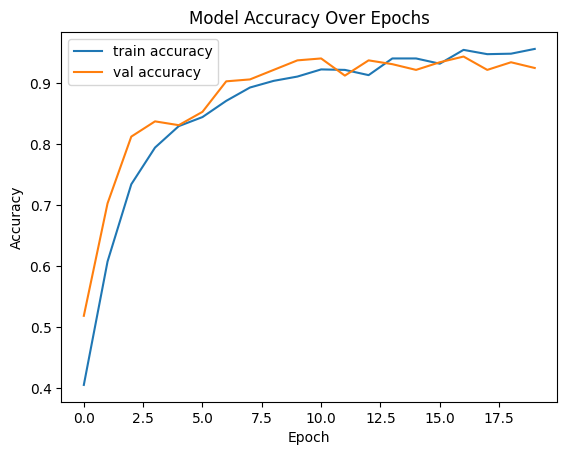

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()